27/11/2023
<img style="float: right; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Logo-ITESO-Vertical-SinFondo-png.png" width="150px" height="150px" />
<h1 align="center">PROYECTO 3: ECUACIONES DIFERENCIALES</h1>

**Datos de los integrantes:**

- **Israel Santiago Gomez:**
- Expediente: 745401
- Correo: israel.santiago@iteso.mx
- **Erik Gabriel Vega Cervantes**
- Expediente: 745264
- Correo: erik.vega@iteso.mx

## Tema:
**Modelado y Simulación del Movimiento de una Masa en un Resorte con Amortiguamiento**

## Objetivos:

### Objetivo general:

Desarrollar un modelo matemático que describa el movimiento de una masa en un resorte con amortiguamiento y simular dicho movimiento para comprender su comportamiento.

### Objetivos específicos:

- Resolver las ecuaciones diferenciales que describen el sistema de masa-resorte con amortiguamiento utilizando los principios de la mecánica newtoniana.

- Establecer las condiciones iniciales del sistema, incluyendo la masa, la velocidad inicial, la constante del resorte, el coeficiente de amortiguamiento y la posición inicial.

- Realizar simulaciones numéricas del sistema para un conjunto de condiciones iniciales. Ejemplo: Vo = [0, 1m/s, 5m/s]

- Visualizar y analizar los resultados de las simulaciones mediante gráficas que representen el desplazamiento, la velocidad y la aceleración de la masa en función del tiempo.

- Comparar los resultados de las simulaciones con las soluciones analíticas.

## Modelo que representa el problema:


El modelo se basa en las siguientes ecuaciones diferenciales que describen el movimiento de una masa $( m )$, unida a un resorte de constante $( k )$ y sometida a un coeficiente de amortiguamiento $( c )$ bajo una fuerza externa $ F(t) $, tal como se muestra en la figura:

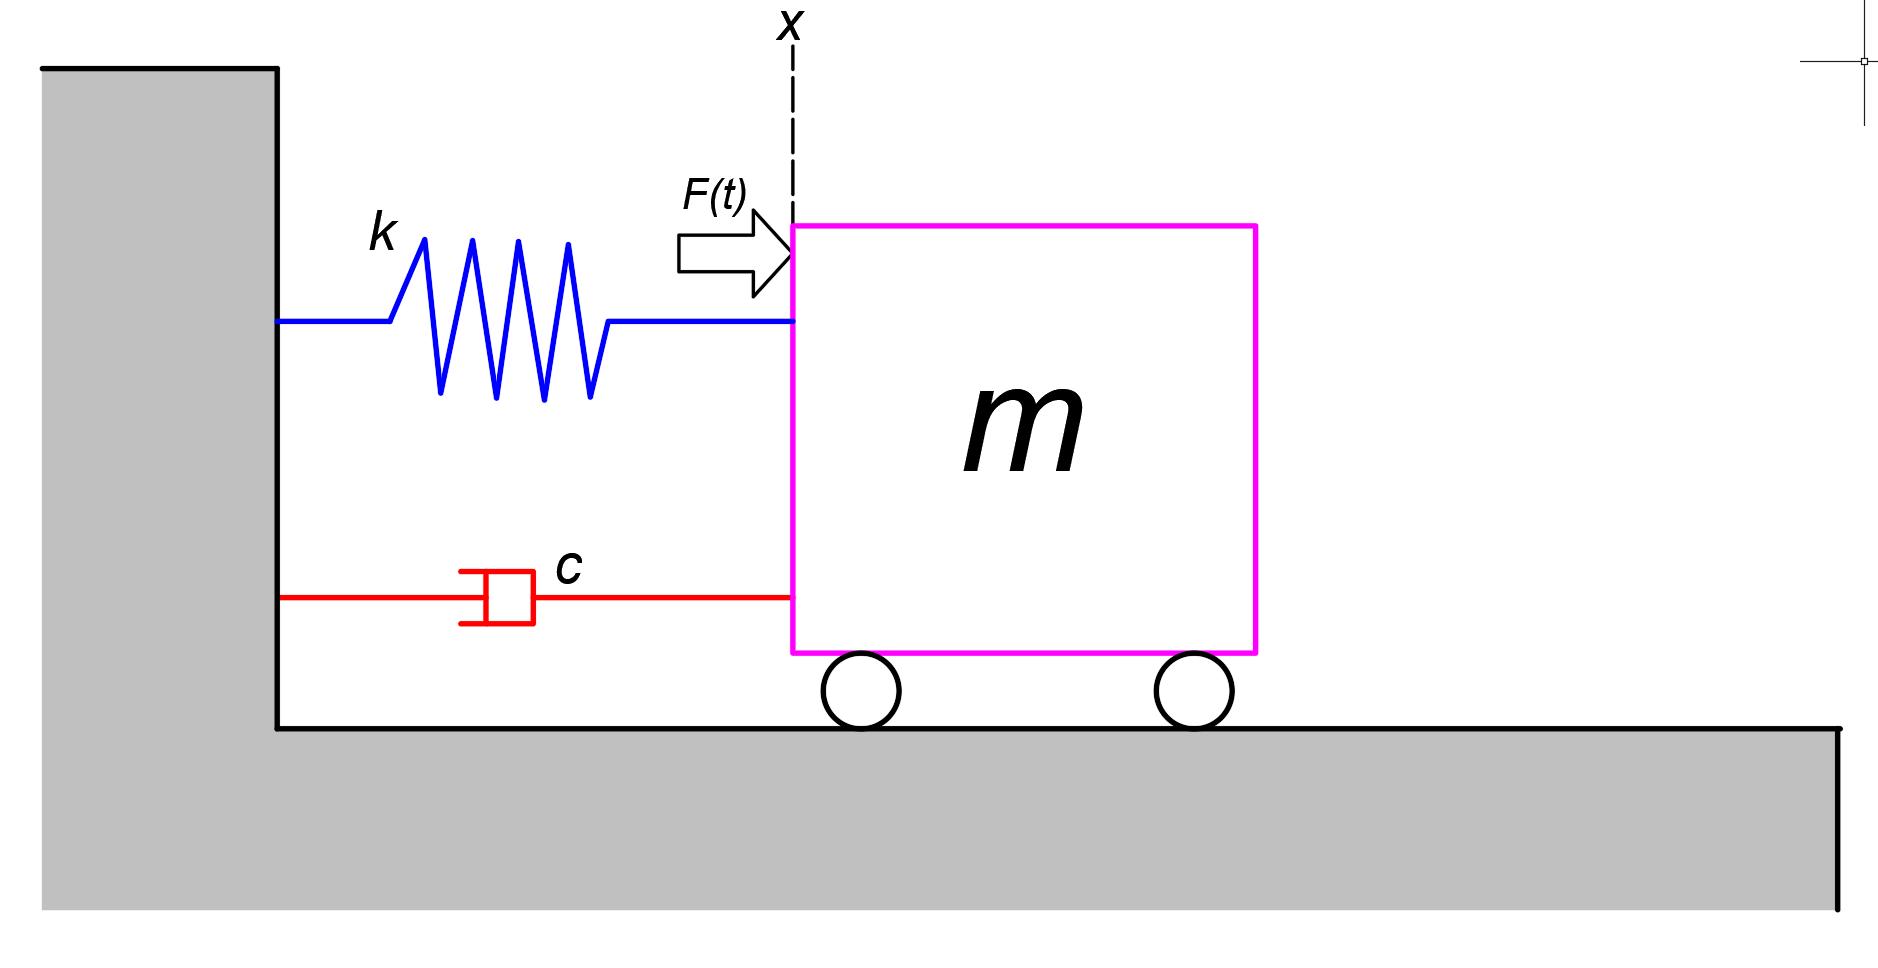


Realizando un diagrama de cuerpo libre tenemos lo siguiente:

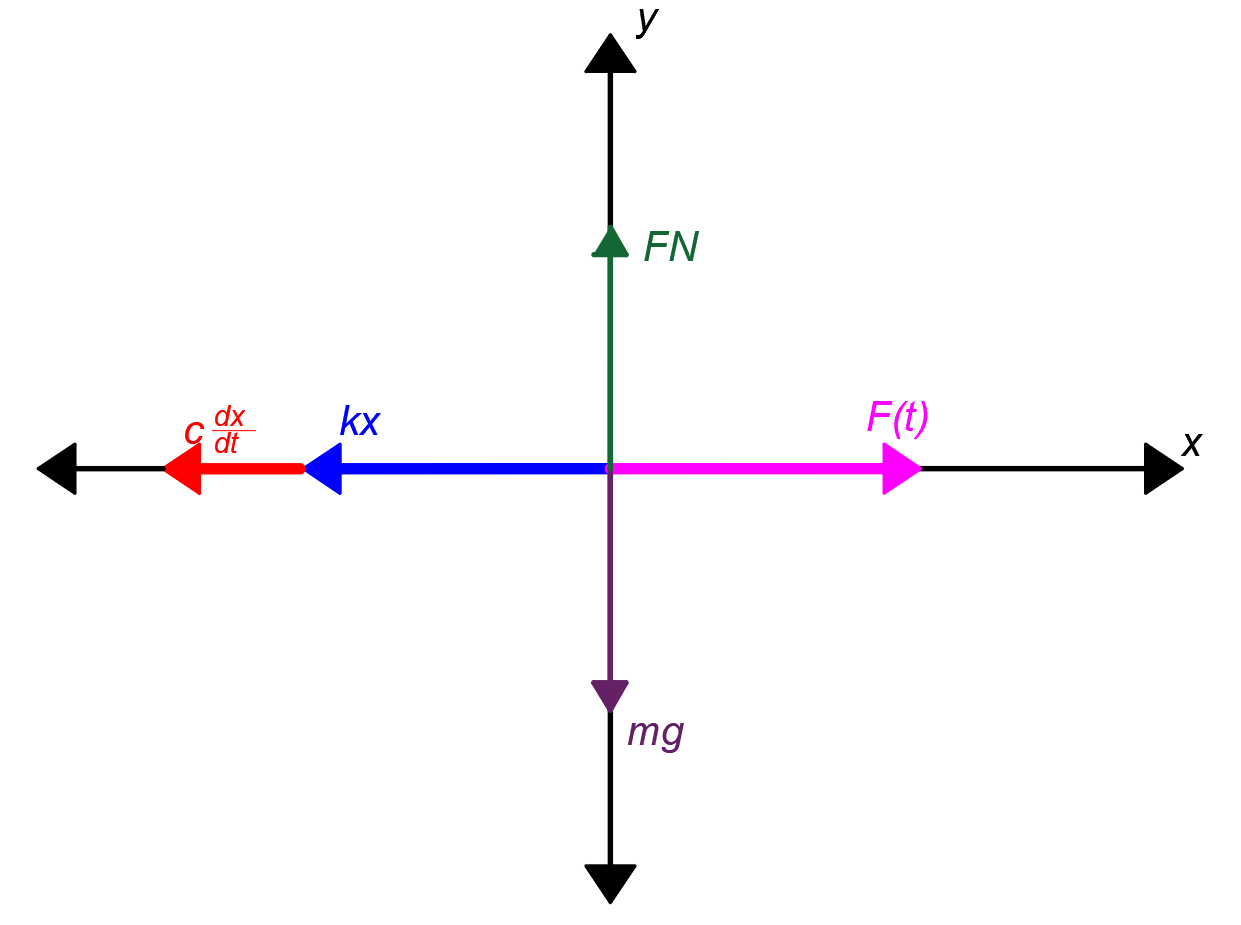

Por sumatorias de fuerzas en el eje $x$ segun nos dictan las leyes de Newton tenemos lo siguiente:
$$
 - c \frac{dx}{dt} - kx + F(t) = m \frac{d^2x}{dt^2}
$$

Acomodando los signos obtenemos la siguiente ecuacion:
$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = F(t)
$$

Donde:

- $ m $ es la masa.
- $ x $ es la posición de la masa.
- $ t $ es el tiempo.
- $ c $ es el coeficiente de amortiguamiento.
- $ k $ es la constante del resorte.
- $ F(t) $ es la fuerza externa en función del tiempo.

## Simulacion

Para el primer caso consideraremos los siguientes valores:
- $ m = 1.0 $
- $ c = 0.8 $ 
- $ k = 10 $ 
- $ F(t) = 0 $

Condiciones inicales:
- $x_{0} = 1, 5$
- $v_{0} = 2, 3$

### Limitaciones del programa:

El programa solo funcionara para sistemas de masa resorte previamente descritos en el modelo que representa el problema

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def masa_resorte(t, X, m, c, k, F):
    x = X[0]
    v = X[1]
    dx = v
    dv = (1/m) * (F(t) - c*v - k*x)
    return [dx, dv]

def F(t):
    return 0

def solucion_numerica(m, c, k, condiciones_iniciales, t):
    sol = solve_ivp(masa_resorte, t, condiciones_iniciales, args=(m, c, k, F), max_step = 0.1)
    return sol

#Condiciones iniciales = [xo, vo]
ci = np.array([[1, 2], [5, 3]])

#Datos:
m = 1.0  
c = 0.5  
k = 10.0  
t_span = [0, 50]

def graficar(sol):
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]

    # Grafica x vs t
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.plot(t, x, label='x(t)')
    plt.title('Posición vs Tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Posición')
    plt.legend()

    # Grafica v vs t
    plt.subplot(132)
    plt.plot(t, v, label='v(t)')
    plt.title('Velocidad vs Tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Velocidad')
    plt.legend()

    # Graficar x vs v
    plt.subplot(133)
    plt.plot(x, v, label='x(v)')
    plt.title('Posición vs Velocidad')
    plt.xlabel('Posición')
    plt.ylabel('Velocidad')
    plt.legend()

    plt.tight_layout()
    plt.show()



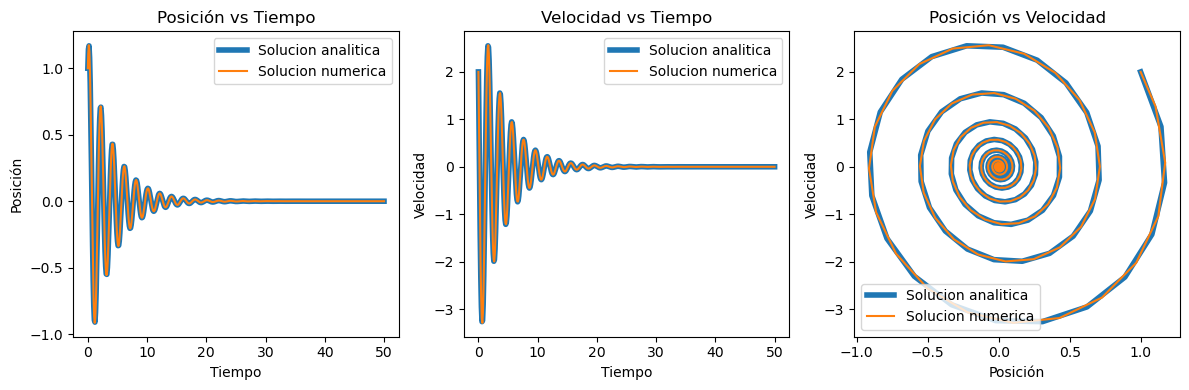

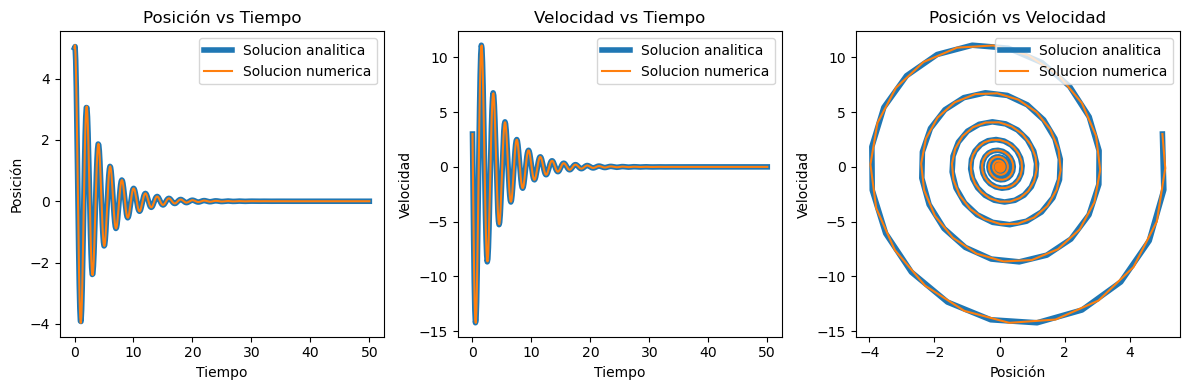

In [3]:
#Comparar con las soluciones analiticas:
t = np.linspace(0, 50 , 500)
t_span = [0, 50]

sol1 = solucion_numerica(m, c, k, ci[0], t_span)
sol2 = solucion_numerica(m, c, k, ci[1], t_span)

t_s = sol1.t
x1 = sol1.y[0]
v1 = sol1.y[1]

x2 = sol2.y[0]
v2 = sol2.y[1]

#Soluciones analiticas obtenidas en wolfram
def pos1 (t):
    return np.e**(-0.25*t)*(0.713746*np.sin(3.15238*t) + np.cos(3.15238* t))

def pos2 (t):
    return np.e**(-0.25*t)*(1.34819*np.sin(3.15238*t) + 5*np.cos(3.15238* t))

def vel1 (t):
    return np.e**(-0.25*t)*(2*np.cos(3.15238*t) - 3.33082*np.sin(3.15238*t))

def vel2 (t):
    return np.e**(-0.25*t)*(3.00001*np.cos(3.15238*t) - 16.0989*np.sin(3.15238*t))

# Graficar x vs t
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(t, pos1(t), label='Solucion analitica', lw = 4)
plt.plot(t_s, x1, label='Solucion numerica')
plt.title('Posición vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

# Graficar v vs t
plt.subplot(132)
plt.plot(t, vel1(t), label='Solucion analitica', lw = 4)
plt.plot(t_s, v1, label='Solucion numerica')
plt.title('Velocidad vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.legend()

# Graficar x vs v
plt.subplot(133)
plt.plot(pos1(t), vel1(t), label='Solucion analitica', lw = 4)
plt.plot(x1, v1, label='Solucion numerica')
plt.title('Posición vs Velocidad')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.legend()

plt.tight_layout()
plt.show()
#-----------------------
# Graficar x vs t
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(t, pos2(t), label='Solucion analitica', lw=4)
plt.plot(t_s, x2, label='Solucion numerica')
plt.title('Posición vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

# Graficar v vs t
plt.subplot(132)
plt.plot(t, vel2(t), label='Solucion analitica', lw = 4)
plt.plot(t_s, v2, label='Solucion numerica')
plt.title('Velocidad vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.legend()

# Graficar x vs v
plt.subplot(133)
plt.plot(pos2(t), vel2(t), label='Solucion analitica', lw = 4)
plt.plot(x2, v2, label='Solucion numerica')
plt.title('Posición vs Velocidad')
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.legend()

plt.tight_layout()
plt.show()

Con esta comparacion se puede observar que la solucion numerica es correcta

Ahora determinaremos para que tiempo el sistema deja de osilar

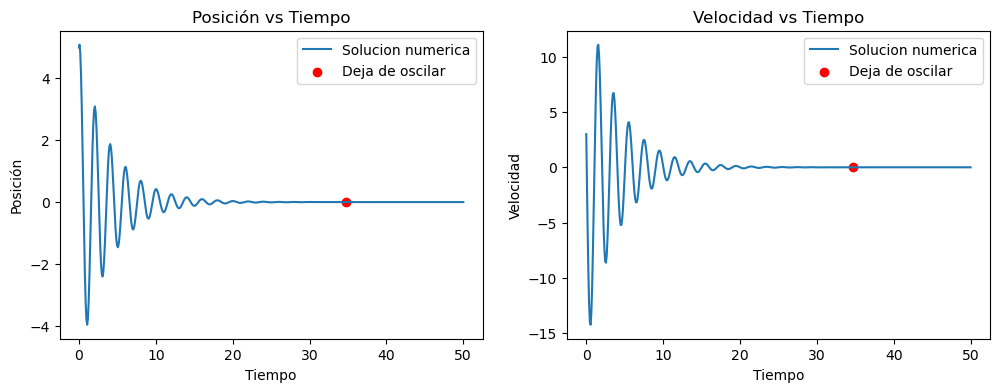

In [4]:
def punto_de_parada(sol):
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]
    t_cero_velocidad = None
    i = 0
    
    while i < len(sol.t) - 1 and (abs(x[i]) > 0.001 or abs(v[i]) > 0.001):
        t_parada = t[i]
        i += 1

    return t_parada

tpar = punto_de_parada(sol2)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(t_s, x2, label='Solucion numerica')
plt.scatter(tpar, 0, label='Deja de oscilar', color='r')
plt.title('Posición vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.subplot(122)
plt.plot(t_s, v2, label='Solucion numerica')
plt.scatter(tpar, 0,  label='Deja de oscilar', color='r')
plt.title('Velocidad vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.legend()


**Nota:** Este codigo funciona para osiladores sin fuerzas externas, ademas que a mayor tiempo de simulacion mejores resultados se obtienen

Ahora agregaremos una fuerza externa $F(t) = \frac{1}{x^2}$ , de esta manera el sistema ya no cuenta con una solucion analitica, para este caso usaremos las siguientes condiciones iniciales:
- $x_{0} = 5$
- $v_{0} = 3$

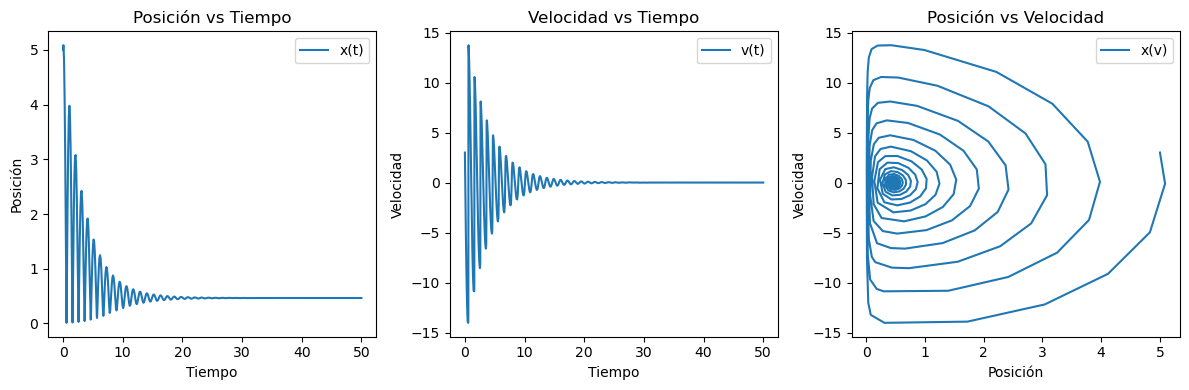

In [5]:
def masa_resorte(t, X, m, c, k, F):
    x = X[0]
    v = X[1]
    dx = v
    dv = (1/m) * (F(t, x) - c*v - k*x)
    return [dx, dv]

def F(t, x):
    return 1/x**2

def solucion_numerica(m, c, k, condiciones_iniciales, t):
    sol = solve_ivp(masa_resorte, t, condiciones_iniciales, args=(m, c, k, F), max_step = 0.1)
    return sol

#Condiciones iniciales = [xo, vo]
ci = [5, 3]

#Datos:
m = 1.0  
c = 0.5  
k = 10.0  
t_span = [0, 50]

sol = solucion_numerica(m, c, k, ci, t_span)

graficar(sol)


Por casos como estos es por lo que puede ser conveniente saber generar una solucion numerica en un sistema de ecuaciones diferenciales

Para finalizar observaremos el comportamiento del sistema al vriar las constates de amortiguamiento, resorte y la masa, con unas condiciones iniciales de $Vo = 0$, $Xo = 3$ en un intervalo de 40 segundos con las siguientes constantes como base:
- $ m = 1.0 $
- $ c = 0.8 $ 
- $ k = 10 $ 
- $ F(t) = 0 $

**resultado de variar la constante de amortiguamiento $c$ [0, 0.5, 2]**

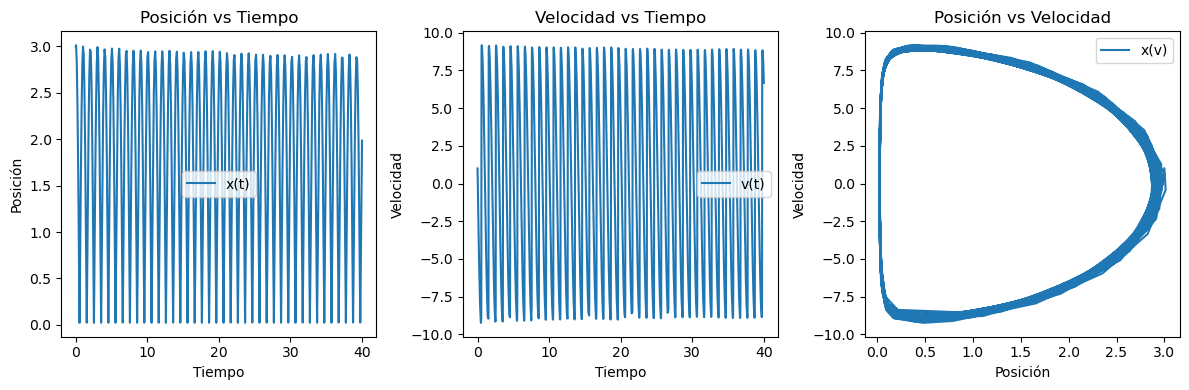

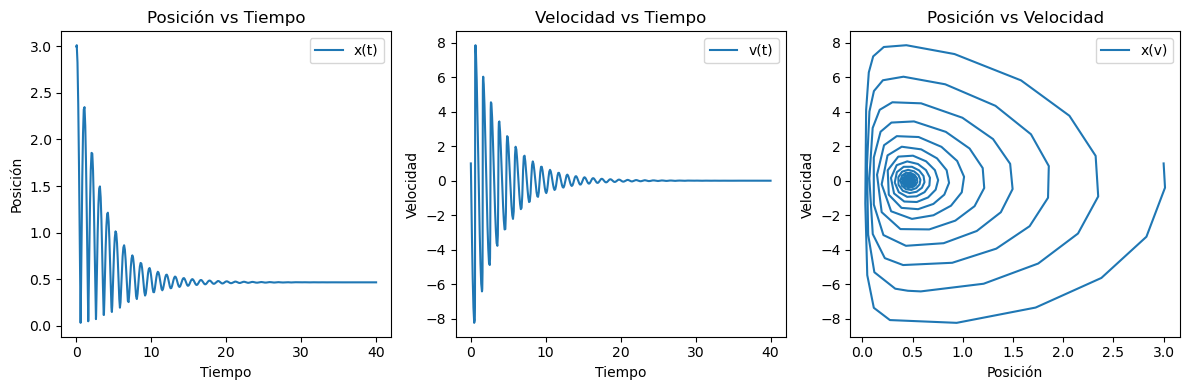

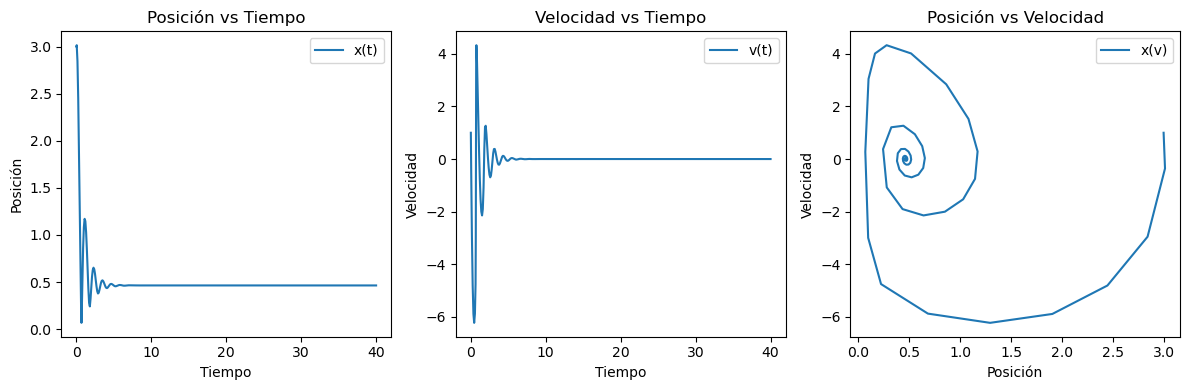

In [6]:
#Condiciones iniciales = [xo, vo]
ci = [3, 1]

#Datos:
m = 1.0  
c = [0, 0.5, 2]  
k = 10.0  
t_span = [0, 40]

for i in range(len(c)):
    solc = solucion_numerica(m, c[i], k, ci, t_span)
    graficar(solc)
    

Conclusion: A mayor contante de amortiguamiento el sistema para mas rapido, si esta constante es cero el sistema osila de manera infinita

**Resultado de variar la constante del resorte $k$ [0, 10, 15]**

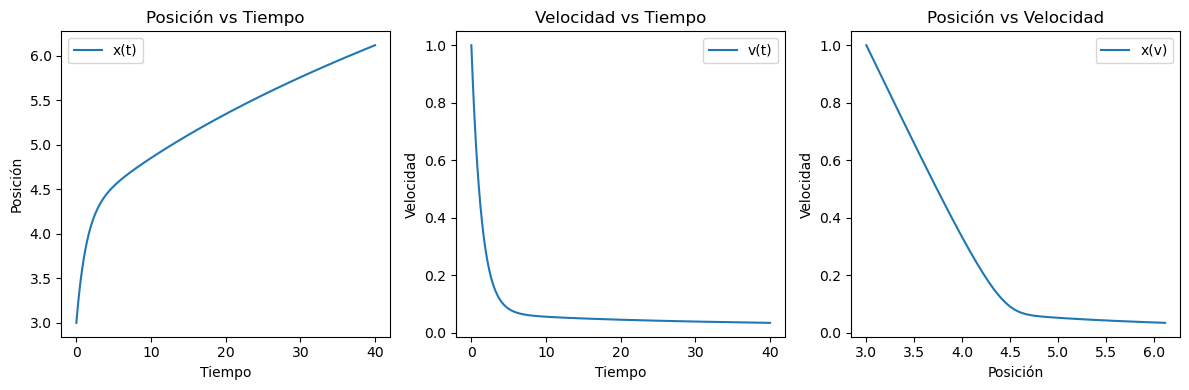

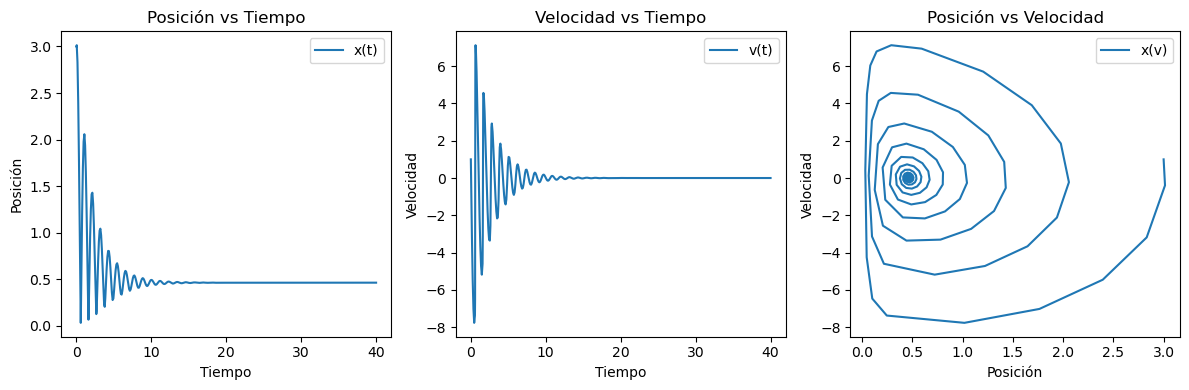

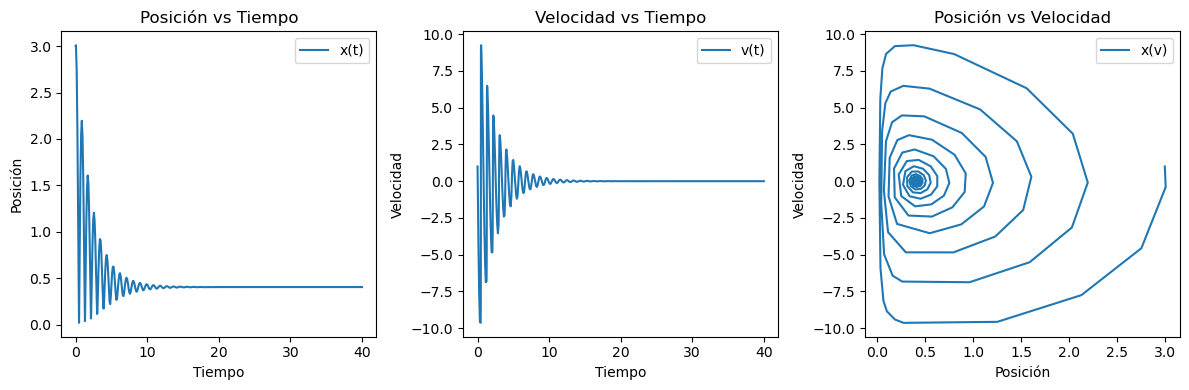

In [7]:
#Datos:
m = 1.0  
c = 0.8  
k = (0, 10, 15) 
t_span = [0, 40]

for i in range(len(k)):
    solk = solucion_numerica(m, c, k[i], ci, t_span)
    graficar(solk)

Conclusion: a mayor constante el sistema se mueve mas rapido, sin embargo el sistema parece parar mas o menos en el mismo tiempo. Si no existe resorte el sistema permanece en movimiento devido a la $V_{0}$ hasta que este es frenado por el amortiguamiento

**Resultado de variar la masa $m$ [1, 3, 10]**

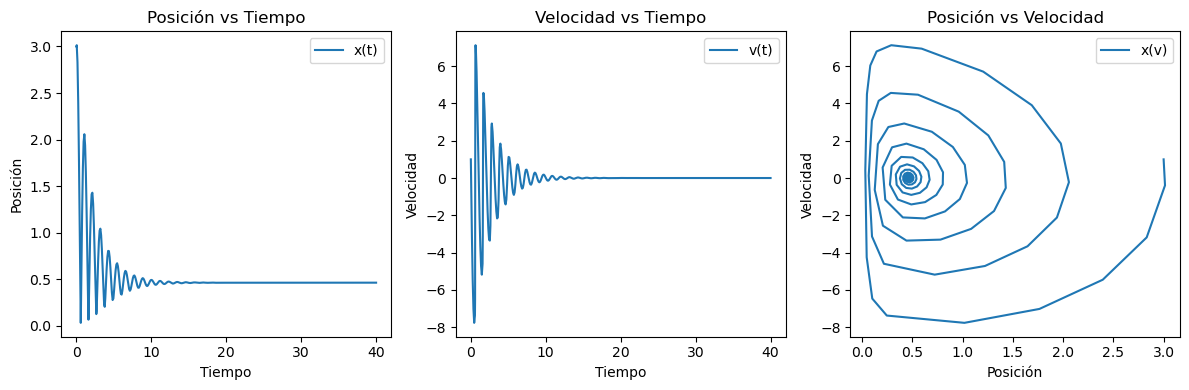

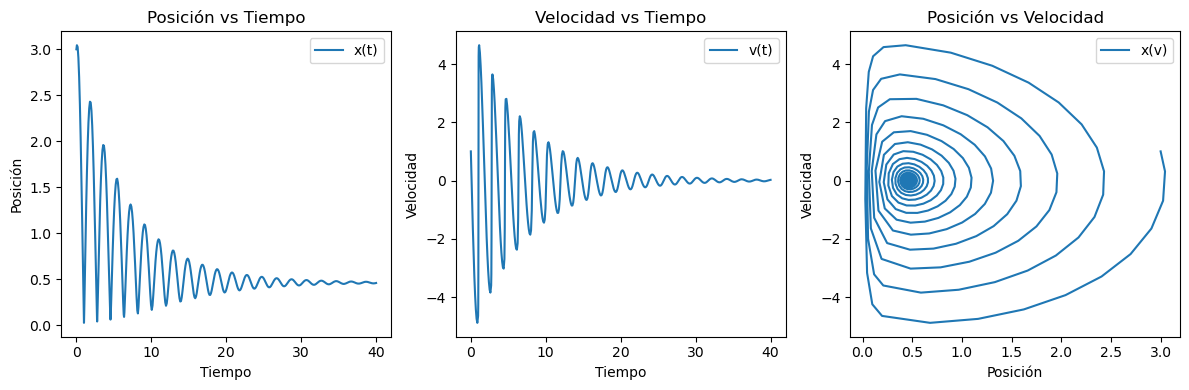

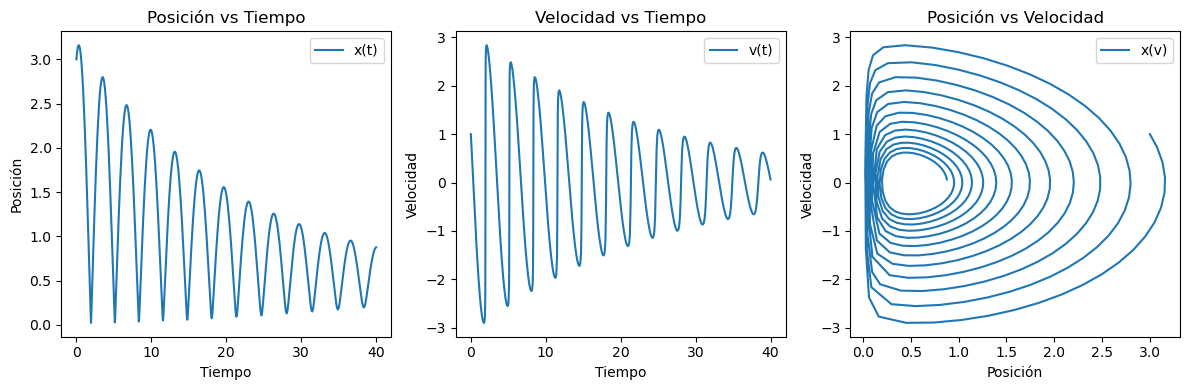

In [9]:
#Datos:
m = [1, 3, 10]  
c = 0.8  
k = 10
t_span = [0, 40]

for i in range(len(m)):
    solm = solucion_numerica(m[i], c, k, ci, t_span)
    graficar(solm)

Conclusion: A mayor masa el intervalo de tiempo entre cada ciclo es mayor y el sistema parece permanecer durante un mayor tiempo osilando

## Conclusion:

En conclusion, se logró desarrollar un modelo matemático basado en ecuaciones diferenciales, resolviendo numéricamente el sistema masa-resorte con amortiguamiento. Se analizaron varios conjuntos de condiciones iniciales y se compararon las soluciones numéricas obtenidas con el programa con soluciones analíticas obtenidas de Wolfram Alpha  y se identificó el punto en el cual deja de oscilar. Finalmente las gráficas mostraron una buena aproximacion con las soluciones analiticas 

Tambien se exploró el sistema ante una fuerza externa variable para mostrar los casos en los que es conveniente utilizar este tipo de simulacion. El proyecto proporciono una comprensión clara del comportamiento del sistema.

## Referencias:

- García, J. (2023-11-20). Las ecuaciones diferenciales y sus aplicaciones en la ingeniería. Recuperado de https://campus.usal.es/~modelosmatematicos/ModelosMatematicos/index_files/Trabajo%20Ec%20Diferenciales%20en%20Ingenieria.pdf

- Señales y Sistemas. (2018, 15 enero). Masa-resorte-amortiguador: ecuación diferencial y función de transferencia [Vídeo]. YouTube. https://www.youtube.com/watch?v=O9yIRbC7CoE